In [1]:
#Included libraries
import math
import copy
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
class Node:
    def __init__(self, state):
        self.state = state
        self.parent = None
        self.action = None

    def print(self):
        if len(self.state) == 8:
            print(self.state)
        print("")

    def backwardList(self):
        answerList = [self]
        while answerList[0].parent != None:
            answerList.insert(0, answerList[0].parent)
        return answerList

In [3]:
class Problem:
    def __init__(self, initialSate):
        self.initialNode = Node(initialSate)
        self.size = len(initialSate)

    def isGoal(self, node):
        if node.state.max() != 8:
            return False
        else:
            return True

    def actions(self, node):
        positions = []
        positions = np.where(node.state == 0)
        return positions
    
    def transition(self, node, action):
        old = node.state
        new = copy.deepcopy(old)
        new[action] = new.max() + 1
        posEvaluated = np.where(new > 0)
        for posFilled in posEvaluated[-1]:
            if (new.max() != new[posFilled]):
                    difRows = (new.max() - 1) - (new[posFilled] - 1)
                    difColumns = abs((np.where(new == new.max())[-1][-1]) - (np.where(new == new[posFilled])[-1][-1]))
                    difRowColA = ((new.max() - 1) - (np.where(new == new.max())[-1][-1]))
                    difRowColB = ((new[posFilled] - 1) - (np.where(new == new[posFilled])[-1][-1]))
                    sumRowColA = ((new.max() - 1) + (np.where(new == new.max())[-1][-1]))
                    sumRowColB = ((new[posFilled] - 1) + (np.where(new == new[posFilled])[-1][-1]))
                    if ((difRows == difColumns) or (difRowColA == difRowColB) or (sumRowColB == sumRowColA)):
                        return None
        transitionedNode = copy.deepcopy(node)
        transitionedNode.state = new
        return transitionedNode
    
    def expand(self, node):
        newNodes = []
        if (np.all(node.state == [0,0,0,0,0,0,0,0])):
            action = np.random.choice(self.actions(node)[-1],1)
            newNode = Node(self.transition(node, action).state)
            newNode.parent = node
            newNode.action = action
            newNodes.append(newNode)
        else:
            for action in self.actions(node)[-1]:
                result = self.transition(node, action)
                if(result is not None):
                    newNode = Node(result.state)
                    newNode.parent = node
                    newNode.action = action
                    newNodes.append(newNode)
        return newNodes    

In [4]:
def DFS(problem):
    frontier = []
    reached = set()
    frontier.append(problem.initialNode)
    reached.add(tuple(problem.initialNode.state))
    while len(frontier) != 0:
        currentNode = frontier.pop()
        if problem.isGoal(currentNode):
            print("There are {0} nodes in the frontier".format(len(frontier)))
            print("There are {0} reached nodes".format(len(reached)))
            return currentNode
            break
        for child in problem.expand(currentNode):
            if tuple(child.state) not in reached:
                reached.add(tuple(child.state))
                frontier.append(child)
    return None

In [5]:
def Graph(result):
    dx, dy = 1, 1
    P = np.arange(1, 8, dx)
    Q = np.arange(1, 8, dy)
    P, Q = np.meshgrid(P, Q)
    res = np.add.outer(range(8), range(8)) % 2

    for i in result:
        res[i - 1, int(np.where(result == i)[-1])] = 2

    cmap = ListedColormap(['black', 'white', 'green'])

    plt.imshow(res, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    plt.show()

There are 7 nodes in the frontier
There are 27 reached nodes
These are the 8 steps to reach the goal node:
[0 0 0 0 0 0 0 0]

[0 1 0 0 0 0 0 0]

[0 1 0 0 0 0 0 2]

[0 1 0 0 0 3 0 2]

[4 1 0 0 0 3 0 2]

[4 1 5 0 0 3 0 2]

[4 1 5 0 6 3 0 2]

[4 1 5 0 6 3 7 2]

[4 1 5 8 6 3 7 2]



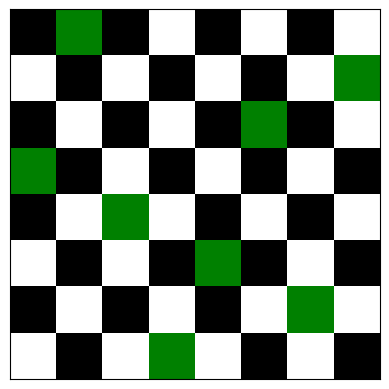

: 

In [6]:
initialState = np.zeros(8, dtype=int)
answer = DFS(Problem(initialState))
if answer != None:
    path = answer.backwardList()
    print("These are the {0} steps to reach the goal node:".format(len(path)-1))
    for n in path:
        n.print()
    Graph(path[-1].state)
else:
    print("The search has failed!")
    print("The initial state was:")
    Node(initialState).print()